In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets

# Backpropagation Algorithm From Scratch

The idea is to implement the **Back Propagation** algorithm to train Feed Forward Neural Networks. 

We will implement the algorithm from scratch in Python, and we will only use built-in libraries and numpy, avoiding for the moment the usage of higher-level frameworks (Pytorch or Tensorflow).

This excersice will help me remeber the foundations of Deep Learning.


## Background

### Loss Function

The **Loss Function** for the moment is the $l_2$ norm of the difference between the predicted and true labels ($\hat y$ and $y$, respecitvely).

$$
L(y, \hat y) = \|y-\hat y \|^2
$$

### Feed Forward Model

The **Feed Forward** model considers the consecutive application of linear transformations and activation functions. Given an input $x$, the model's output is given by:

$$
g(x) = f_K(f_{K-1}(\cdots f_2(f_1(x))))
$$

where:
$$
\\
f_0 = x,  \\
f_i = \sigma(A_{i-1}f_{i-1}+b_{i-1})
$$


For simplicity, we consider the activation functions to be the sigmoid function:

$$
\sigma (x) = \dfrac{1}{1+e^{-x}},  \\
\sigma ' (x) = \sigma (x) (1-\sigma (x))
$$



### Learning using Gradient Descent


Notice that the model $g(x)$ depends on the parameters $\{A_0, b_0, \cdots, A_{K-1}, b_{K-1}\}$ that represent the weights ($A_i$) and the biases ($b_i$) of the model. Such parameters are optimized using a Gradient Descent algorithm, which updates the values of the parameters iteratively by following the rule:


$$
A_i \leftarrow A_i - \alpha \dfrac{\partial L}{\partial A_i} \\
b_i \leftarrow b_i - \alpha \dfrac{\partial L}{\partial b_i}
$$

where $\alpha$ is the learning rate.


Hence, the question is: How do we estimate $\dfrac{\partial L}{\partial A_i}$? The answer is the Backpropagation algorithm, which in turn is based on a reverse application of the Chain Rule for diferentiation.

### Chain Rule


Consider the model for $g(x)$ by using the following auxiliary variables:

$$
h_i = A_{i-1}f_{i-1}+b_{i-1} \\
f_i = \sigma (h_i)
$$

where the boundary conditions is $f_0 = x$.

The Chain Rule states:

$$
\dfrac{\partial L}{\partial A_{K-1}} = \dfrac{\partial L}{\partial f_K} \dfrac{\partial f_K}{\partial h_K} \dfrac{\partial h_K}{\partial A_{K-1}} \\
\dfrac{\partial L}{\partial A_{K-2}} = \dfrac{\partial L}{\partial f_K} (\dfrac{\partial f_K}{\partial h_K} \dfrac{\partial h_K}{\partial f_{K-1}} ) (\dfrac{\partial f_{K-1}}{\partial h_{K-1}} \dfrac{\partial h_{K-1}}{\partial A_{K-2}} )\\
\dfrac{\partial L}{\partial A_{K-3}} = \dfrac{\partial L}{\partial f_K} (\dfrac{\partial f_K}{\partial h_K} \dfrac{\partial h_K}{\partial f_{K-1}} ) (\dfrac{\partial f_{K-1}}{\partial h_{K-1}} \dfrac{\partial h_{K-1}}{\partial f_{K-2}} ) (\dfrac{\partial f_{K-2}}{\partial h_{K-2}} \dfrac{\partial h_{K-2}}{\partial A_{K-3}} )\\
\dfrac{\partial L}{\partial A_{i}} = \dfrac{\partial L}{\partial f_K} (\dfrac{\partial f_K}{\partial h_K} \dfrac{\partial h_K}{\partial f_{K-1}} ) (\dfrac{\partial f_{K-1}}{\partial h_{K-1}} \dfrac{\partial h_{K-1}}{\partial f_{K-2}} )\cdots(\dfrac{\partial f_{i+2}}{\partial h_{i+1}} \dfrac{\partial h_{i+1}}{\partial f_{i+1} }) (\dfrac{\partial f_{i+1}}{\partial h_{i+1}} \dfrac{\partial h_{i+1}}{\partial A_{i} })\\
$$


Some of the terms are:

$$
\dfrac{\partial L}{\partial f_K}  = \dfrac{\partial }{\partial f_K} \| y-f_K\|^2 = -2 (y-f_k)I \\
\dfrac{\partial f_i}{\partial h_i} = \sigma (h_i) (1-\sigma (h_i)) \\
\dfrac{\partial h_i}{\partial f_{i-1}} = A_{i-1} \\
\dfrac{\partial h_i}{\partial A_{i-1}} = f_i \otimes I
$$


## Toy example

Consider $K=2$.

The computational graph is:

$$
f_0 = x \\
\rightarrow h_1 = A_0x+b_0  \\
\rightarrow f_1 = \sigma (h_1) \\
\rightarrow h_2 = A_1 f_2+b_1 \\
\rightarrow f_2 = \sigma (h_2)
$$

Then, the gradients are:

$$
\dfrac{\partial L}{\partial A_1} = \dfrac{\partial L}{\partial f_2} \dfrac{\partial f_2}{\partial h_2} \dfrac{\partial h_2}{\partial A_1} = -2(y-f_2)I \cdot \sigma (h_2) (1-\sigma (h_2)) \cdot f_2 \otimes I \\
\dfrac{\partial L}{\partial A_0} = \dfrac{\partial L}{\partial f_2} \dfrac{\partial f_2}{\partial h_2}\dfrac{\partial h_2}{\partial f_1} \dfrac{\partial f_1}{\partial h_1} \dfrac{\partial h_1}{\partial A_0} = -2(y-f_2)I \cdot \sigma (h_2) (1-\sigma (h_2)) \cdot A_1 \cdot \sigma (h_1) (1-\sigma (h_1)) \cdot f_1 \otimes I
$$


## To DO -  First Implementation (Toy Example):

We will start with a simple regression model, using a feed-forward NN with only 2 hidden layers. 

The objective is to derive the backprop equations by hand, and implement them transparently. Then. we will implement a generalization of the algorithm.



    1. Load training/test data X/Y
    2. Create a NN using Feed Forward Architechture
    3. Calculate A loss Function
    4. Implement the optimization of the Loss Function through Backpropagation (Derive the math)

In [3]:
X, y = sklearn.datasets.load_boston(return_X_y=True)

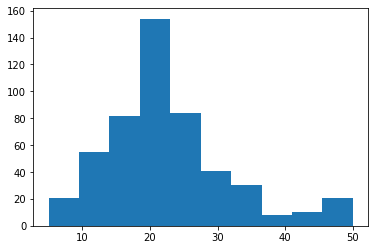

In [4]:
plt.hist(y)
plt.show()

In [17]:
class NeuralNetwork():
    def __init__(self, input_dim, hidden_layers, output_dim):
        
        # Shapes of input, output and weight matrices
        self.i_d = input_dim
        self.o_d = output_dim
        self.hidden_layers = hidden_layers
        
        # Init weights
        self.init_weights()
        
    
    # Loss Function
    def loss(self, y_true, y_pred):
        return np.linalg.norm(y_true-y_pred)
    
    # Initialize random weights
    def init_weights(self):
        layers =  [self.i_d]+self.hidden_layers+[self.o_d]
        self.weights = [np.random.rand(layers[i+1], layers[i]) for i in range(len(layers)-1)]
        self.biases = [np.random.rand(layers[i+1]) for i in range(len(layers)-1)]
    
    def sigmoid(self, x):
        return np.exp(x)/(1+np.exp(x))
    
    @staticmethod
    def sigmoid_derivative(self, x):
        return self.sigmoid(x)*(1.0-self.sigmoid(x))

    def forward_propagation(self, x):
        z = np.copy(x)
        for (w,b) in zip(self.weights, self.biases):
            h = np.matmul(w, z)+b
            print(h)
            z = self.sigmoid(h)
        return z
        
    def backward_propagation(self, x, y):
        return None
    
    def train(self):
        pass
    
        
        

In [18]:
input_dim = X.shape[1]
output_dim = 1
layers = [16, 8, 4]

In [19]:
model = NeuralNetwork(input_dim, layers, output_dim)
z = model.forward_propagation(X[1])

[195.30904155 308.60588814 424.82504162 221.90710708 314.64799731
 473.4865447  436.90112073 434.20011785 326.17703638 549.8328171
 539.0789653  327.29832239 379.12563715 165.09029629 458.23255385
 438.00229204]
[ 9.22073266 10.04812776  8.32545072 11.66573707  9.74218925  8.24978706
  7.93529688  5.62032806]
[6.32492248 6.06050001 5.06877668 3.49547883]
[2.35285036]


In [78]:
z

array([14854.18677312])